<h1> THE SPARKS FOUNDATION [GRIPJAN21] - DATA SCIENCE AND BUSINESS ANALYTICS INTERN </h3>
<h2> NAME :- SHIVANI SANJAY GHUMADE </h2>
<h2> TASK 2: Prediction using Unsupervised ML </h2>

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**DATA SOURCE:** https://bit.ly/3kXTdox

<h2>IMPORTING ESSENTIAL LIBRARIES

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

<h2>DATA LOADING AND OVERVIEW

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
# Printing first 5 rows of Data.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Printing last 5 rows of Data.
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
# Printing shape(rows,columns) of the Data.
iris_df.shape

(150, 4)

In [6]:
# Printing the columns of data
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# Print basic statistical details like percentile, mean, std etc. of a data frame 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Finding out are there any missing or null values in the data.
iris_df.isnull==True

False

<h3>As there is no null value in the Dataset, we can now visualize our Data.

<h2>DATA VISUALIZATION

In [10]:
#corr() is used to find the pairwise correlation of all columns in the dataframe.
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


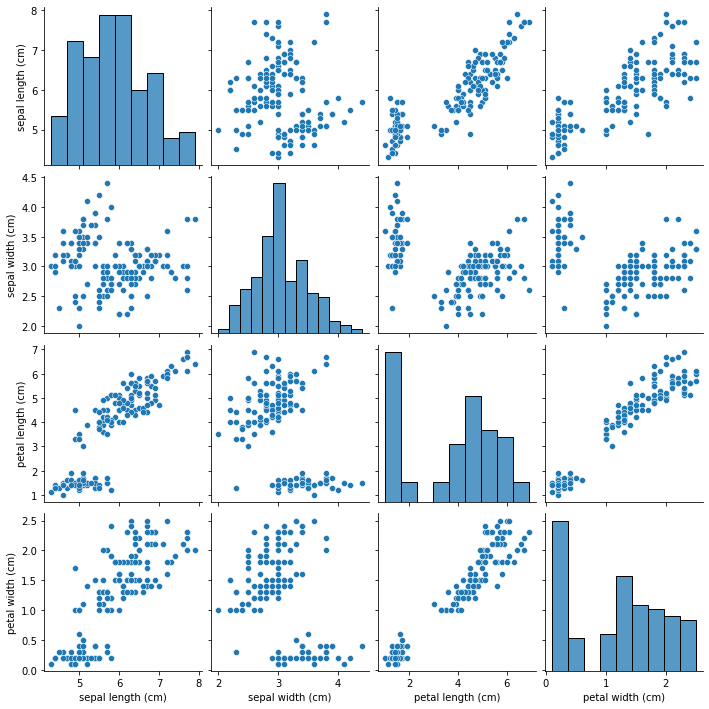

In [11]:
#A pairplot plot a pairwise relationships in a dataset. 
sns.pairplot(iris_df)

<h3>Now we select all four features i.e. Sepal length, Sepal width, Petal length, Petal width of the dataset in avariable x so that we can train our model with these features.

In [12]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

<h2>Finding the optimum number of clusters for k-means classification

In [13]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<h2> ELBOW METHOD

<h4>How does one determine the value of K?

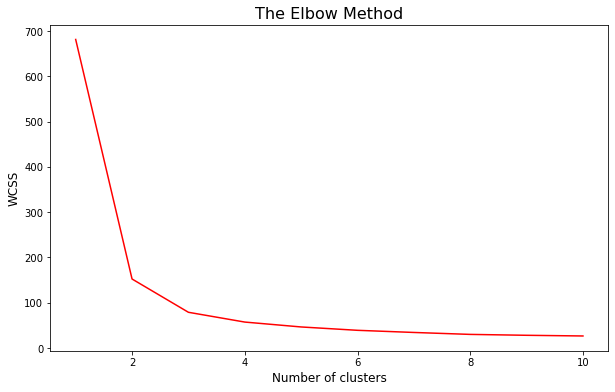

In [14]:
# Setting the figure size
plt.figure(figsize=(10,6))

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, color='red')
plt.title('The Elbow Method',fontsize=16)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('WCSS',fontsize=12) # Within cluster sum of squares
plt.show()

<h4>From the above "The Elbow Method" graph, the optimum clusters is determined where the elbow occurs.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
<H4>The shape of elbow has formed at K=3 so  we choose the number of clusters as "3".

<h3>TRAINING THE K-MEANS MODEL ON THE DATASET

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


<h3> VISUALIZING THE CLUSTERS

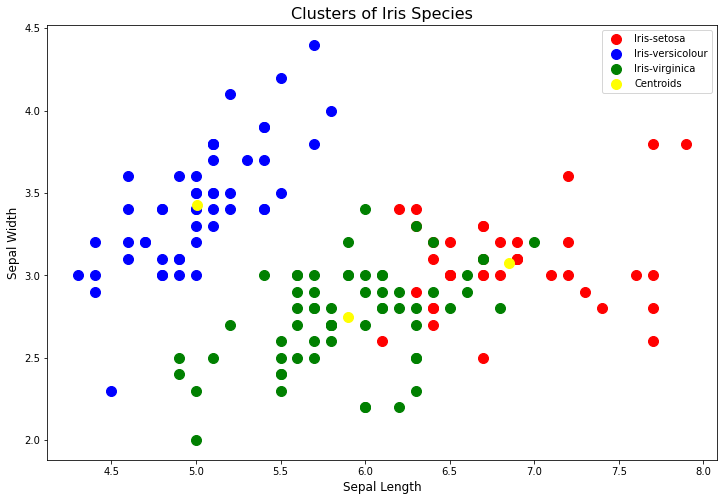

In [16]:
# Setting the figure size
plt.figure(figsize=(12,8))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Species',fontsize=16)
plt.xlabel('Sepal Length',fontsize=12)
plt.ylabel('Sepal Width',fontsize=12)

plt.legend()

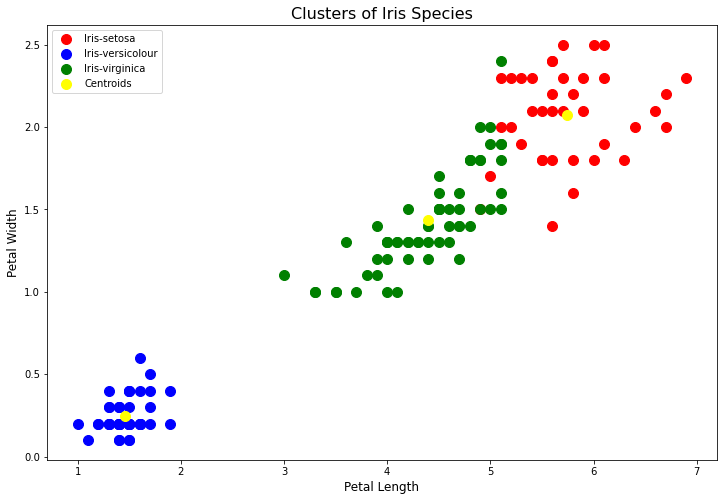

In [17]:
# Setting the figure size
plt.figure(figsize=(12,8))

# Visualising the clusters - On the 3rd and 4th columns
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Species',fontsize=16)
plt.xlabel('Petal Length',fontsize=12)
plt.ylabel('Petal Width',fontsize=12)

plt.legend()

**This concluded K- Means Clustering**

<h2> TASK 2 COMPLETED!

<H3>THANK YOU!